In [218]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [65]:
from pydataset import data
mpg = data("mpg=")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [91]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [66]:
#On average, which manufacturer has the best miles per gallon?
mpg["average_mpg"] = (mpg.cty + mpg.hwy) / 2
mpg.groupby("manufacturer").average_mpg.mean().sort_values(ascending = False).head(1)

manufacturer
honda    28.5
Name: average_mpg, dtype: float64

In [67]:
#How many different manufacturers are there?
mpg.manufacturer.unique().size

15

In [68]:
#How many different models are there?
mpg.model.unique().size

38

In [85]:
#Do automatic or manual cars have better miles per gallon?
mpg["type_of_trans"] = mpg.trans.apply(lambda n: 'auto' if "auto" in n else 'manual')
mpg.groupby("type_of_trans").average_mpg.mean()

type_of_trans
auto      19.130573
manual    22.227273
Name: average_mpg, dtype: float64

## 2. Joining and Merging

In [96]:
#Copy the users and roles dataframes from the examples above. 
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users


,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [97]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [98]:
#What do you think a right join would look like?
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

#Why  id_y 4 join the left

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [99]:
#An outer join? 
pd.merge(users, roles, left_on = 'role_id', right_on = 'id', how = 'outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [ ]:
#What happens if you drop the foreign keys from the dataframes and try to merge them?


## 3. Getting data from SQL databases

In [10]:
# 1. Create a function named get_db_url. It should accept a username, hostname, password and database name
#and return a url formatted like in the examples in this lesson.
def get_db_url(db_name):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url


In [11]:
#2. Use your function to obtain a connection to the employees database.
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url("employees"))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [28]:
#3. Once you have successfully run a query:
    #Intentionally make a typo in the database url. What kind of error message do you see?
    #Intentionally make an error in your SQL query. What does the error message look like?
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', get_db_url("employees"))   

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [290]:
#4.Read the employees and titles tables into two separate dataframes
employees = pd.read_sql('SELECT * FROM employees', get_db_url("employees"))
titles = pd.read_sql('SELECT * FROM titles', get_db_url("employees"))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

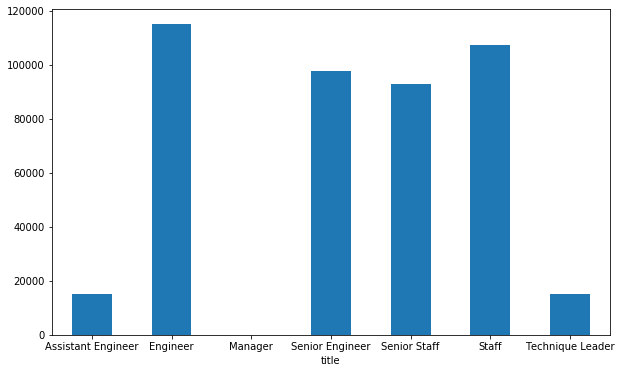

In [293]:
# 5. Visualize the number of employees with each title.
plt.figure(figsize = (10, 6))
titles.groupby("title").emp_no.count().plot.bar()
plt.xticks(rotation = 0)


In [294]:
# f. Join the employees and titles dataframes together
pd.merge(employees, titles, left_on = "emp_no", right_on = "emp_no" ).head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [295]:
# 6. For each title, find the hire date of the employee that was hired most recently with that title.

current_titles.groupby("title").from_date.max()

title
Engineer            1998-05-24
Senior Engineer     2000-01-15
Senior Staff        2002-01-31
Technique Leader    1994-05-21
Name: from_date, dtype: object

In [302]:
titles[titles.emp_no == 498093]

,emp_no,title,from_date,to_date,days_employed
440519,498093,Engineer,1998-02-10,1998-02-10,0 days


In [301]:
# g. Visualize how frequently employees change titles.
today = dt.datetime.today().date()
titles["to_date"] = titles.to_date.apply(lambda x: today if x > today else x )
titles["days_employed"] = titles.to_date - titles.from_date
title_and_date = titles.groupby("emp_no").agg({'title': 'count', 'days_employed': 'sum'})
title_and_date["frequency"] = title_and_date.days_employed / title_and_date.title
title_and_date.sort_values(by = 'frequency', ascending = False)

,title,days_employed,frequency
emp_no,,,
200241,1,12817 days,12817 days
235233,1,12817 days,12817 days
51773,1,12816 days,12816 days
33092,1,12816 days,12816 days
292725,1,12816 days,12816 days
...,...,...,...
418999,1,0 days,0 days
260100,1,0 days,0 days
80863,1,0 days,0 days


In [298]:
title_and_date.shape

(135, 3)

In [286]:
#write the code necessary to create a cross tabulation of the number of titles by department. 
#(Hint: this will involve a combination of SQL and python/pandas code)
sql_query = '''
                SELECT emp_no, title, dept_name 
                FROM employees_with_departments ewd 
                JOIN titles t USING(emp_no)
                '''
title_dept = pd.read_sql(sql_query, get_db_url("employees"))

pd.crosstab(title_dept.dept_name, title_dept.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


## 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:


In [242]:
chipotle = pd.read_sql('SELECT order_id, item_name, item_price, quantity FROM orders', get_db_url("chipotle"))
chipotle.item_price = chipotle.item_price.str.replace("$", "").astype("float")

In [254]:
#What is the total price for each order?ch
chipotle["total_price_for_each_answer"] = chipotle.item_price * chipotle.quantity
chipotle.groupby("order_id").total_price_for_each_answer.sum().head()


order_id
1    11.56
2    33.96
3    12.67
4    21.00
5    13.70
Name: total_price_for_each_answer, dtype: float64

In [253]:
#2.What are the most popular 3 items?
chipotle.groupby('item_name').quantity.sum().sort_values(ascending = False).head(3)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

In [261]:
# 3.Which item has produced the most revenue
chipotle.groupby('item_name').total_price_for_each_answer.sum().sort_values(ascending = False).head(1)

item_name
Chicken Bowl    8044.63
Name: total_price_for_each_answer, dtype: float64